# Spectral and Cross-Spectral Analysis
##### Matthew Vowels, Laura Vowels and Nathan Wood

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from scipy import signal
from sklearn.linear_model import LinearRegression

# 0. Why?

##### What are cycles and what is periodic fluctuation? 

Any phenomenon that rises and falls at a regular frequency.

##### Why is it useful to consider periodic fluctuation in time series? 

1. Many phenomena exhibit perdiodic fluctuation (social, biological, natural, financial etc.)
2. Periodic fluctuations will conflict with any linear relationships we are interesting.
3. Understanding periodicity gives us insight into the natural 'rhythm' of a phenomenon. It can be used to uncover additional relationships between phenomena.


#####  What are we proposing?

To undertake DFT/FFT to analyse the time series for periodic fluctuation. High order polynomials may be able to capture such fluctuations but these are just are overfitting to an underlying structure in the data, and do not account for varying phase.


##### What can we use it for?

- Identifying periodicity. 
- Building temporal models of phenomena (e.g. for prediction)
- Acquiring spectral coefficients (corresponding with amplitudes) for purposes of downstream analyses.

##### How often do we need to sample data for this method?
Depends as much on the theory behind the phenomenon as it does for the analysis. The analysis is only limited by the principle tenets of information theory, as everything is.

##### How many sample points do we need?

##### How do we measure our variables for best results?



### Define some terms:
- Frequency - the number of cycles in a given time period.

- Period - the time between the beginning and end of a cycle at a certain frequency.

- Amplitude - the one-sided peak level of a periodic signal.

- Phase - for a given frequency, at what point in the cycle does it start?

- Sampling frequency - how often we acquire data.

- Nyquist limit/frequency - half the sampling frequency. This is the highest frequency of periodicity that we can hope to recover for a given sampling frequency.

- Aliasing - when a frequency higher than the Nyquist limit is `reflected' into the lower frequency range. 

- Ergodicity - for our purposes, we use it to describe a system for which the behaviour does not change over the course of measurment. 

- Frequency Spectrum - a scale describing the amplitudes or power across frequency in a signal.

- Spectral analysis - a means to decompose a time series into its constituent spectral components.

- Cross-spectral analysis - a means to compare TWO time series and measure the degree of similarity in the frequency domain.

- DFT - Discrete Fourier Transform - a means to undertake spectral analysis. It transforms a discrete time series into complex coefficients. Sometimes referred to as FFT (Fast Fourier Transform) which is the algorithmic implementation.

- Power spectrum - the squared magnitude of the amplitude/frequency spectrum.

- Window - a segment of time.

- Window function - an 'envelope' over the window/segment. Hann, Blackman/Harris, Hamming etc.

#### See how regression fails to capture this structure:

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


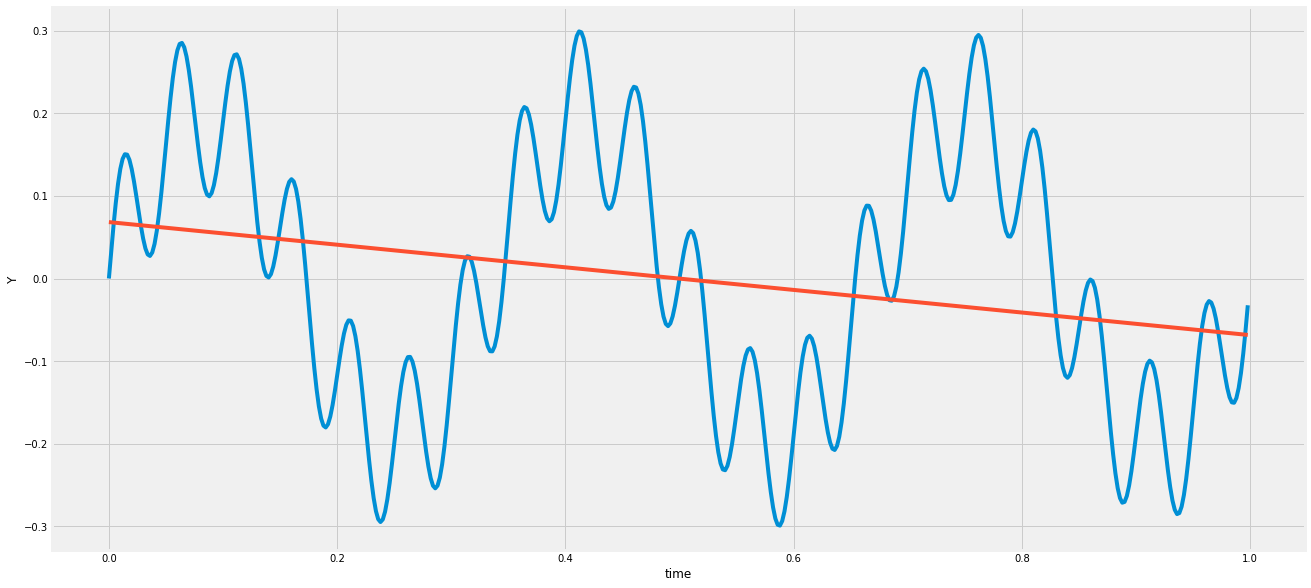

In [2]:
# create time index (between 0 and 1) with same number of time points as sample dataset. Assume we have 2 months time scale
Nt = 500
time_index = np.linspace(0,1-(1/Nt),Nt)
Fs = 30 # sampling frequency in samples per month

# sample time series with cycles at once per month
x1 = 0.1 * np.sin(2*time_index*np.pi*20) + 0.2 * np.sin(2*time_index*np.pi*3)

#x1 = 0.6 * time_index + 0.1 * np.sin(2*time_index*np.pi*20) + 0.2 * np.sin(2*time_index*np.pi*3)

y = x1.reshape((-1, 1))
x = time_index.reshape((-1, 1))
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)
plt.figure(figsize=(20,10))
plt.plot(time_index, x1)
plt.plot(time_index, y_pred)
plt.xlabel('time')
plt.ylabel('Y')
plt.show()

# 1. Fourier

We need a way to represent time series in terms of fundamental basis functions. Ideally we need to be able to represent ANY time series with these basis functions. 


Fourier's theorem states that any periodic waveform may be represented as an infinite sum of sines and cosines (recall that cosine is a sine wave shifted in phase by 90 degrees).

We make an assumption that our time series is periodic (even if it isn't) in order to decompose it into sines and cosines. Let's see if we can represent a square wave using only sine waves... 

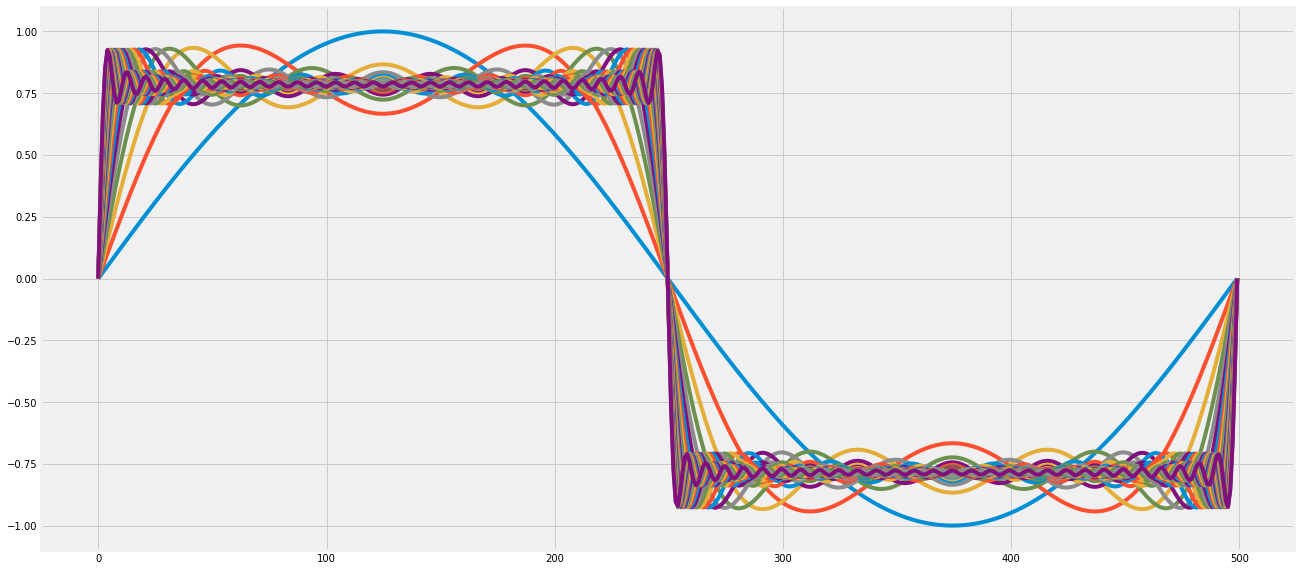

In [21]:
num_sines = 30
points = 500
t = np.linspace(0,2*np.pi,points)
y = np.zeros((num_sines,len(t)))
x = np.zeros(len(t));

for k in range(0,num_sines):

   x += np.sin(((2*k)+1)*t)/((2*k)+1)
   y[k,:] = x
plt.figure(figsize=(20,10))
for i in range(0, num_sines):
    plt.plot(y[i,:])
     
plt.show()

We are using sine waves as basis functions to represent our time series. In the limit, we experience 'Gibb's phenomenon' which affects our ability to represent discontinuities. In practice this is not an issue.

Let's say we have a theory that some variable Y varies once a month, and we have 60 days worth of data, sampled once daily.

In [4]:
# create time index (between 0 and 1) with same number of time points as sample dataset. Assume we have 2 months time scale
Nt = 60
time_index = np.linspace(0,1-(1/Nt),Nt)
Fs = 30 # sampling frequency in samples per month


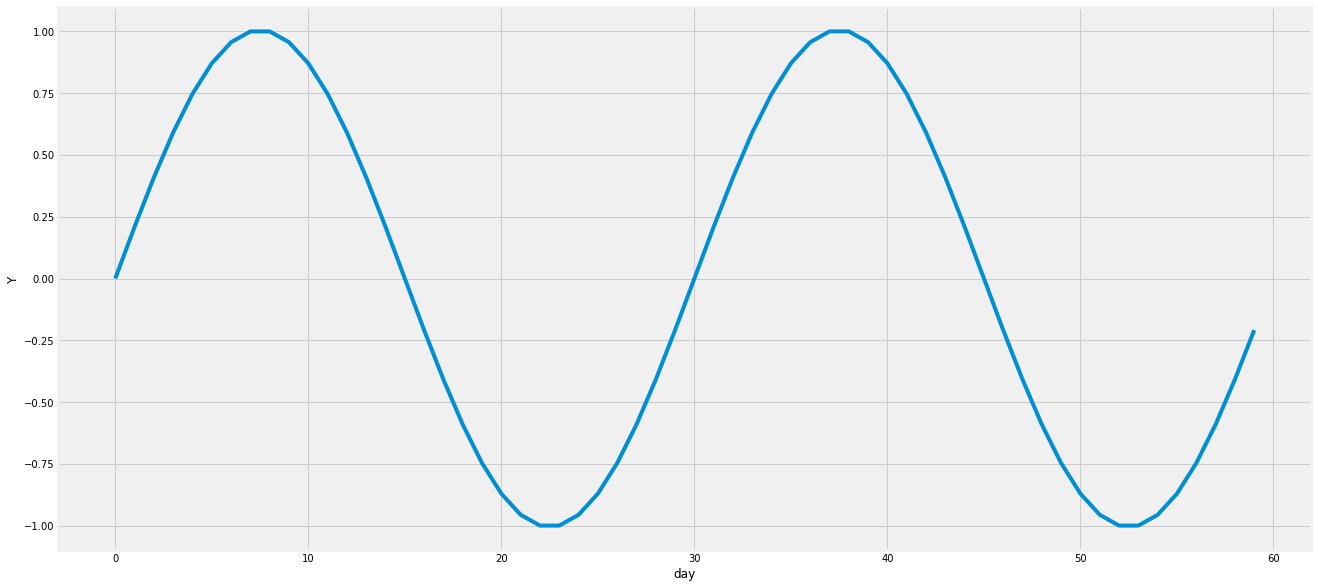

In [5]:
# sample time series with cycles at once per month
x1 = np.sin(2*time_index*np.pi*2) 

# rescale to be between -1 and 1
x1 = 2 *( x1-x1.min())/(x1.max() - x1.min()) - 1
plt.figure(figsize=(20,10))
plt.plot(time_index*Nt,x1)
plt.xlabel('day')
plt.ylabel('Y')
plt.show()

Note that there is no 'phase offset to this'. If we want to, say, delay the rise of the wave (at this SPECIFIC frequency) by 5 days, then we need to understand the relationship between 5 days and the total period of the wave of 2*pi. e.g. our frequency is 30 days (once per month = 2*pi) then 5 days is 5/30 * 2pi.

The important thing to understand here is that 'phase' is specific to the wave, not the overall time series. If we want to delay the entire timeseries, then we add our shift to 'time_index' directly. 

In [6]:
days_delay = 15 # for specific frequency
# sample time series with cycles at once per month
x1 = np.sin(2*time_index*np.pi*2 - (days_delay/30)*2*np.pi ) 

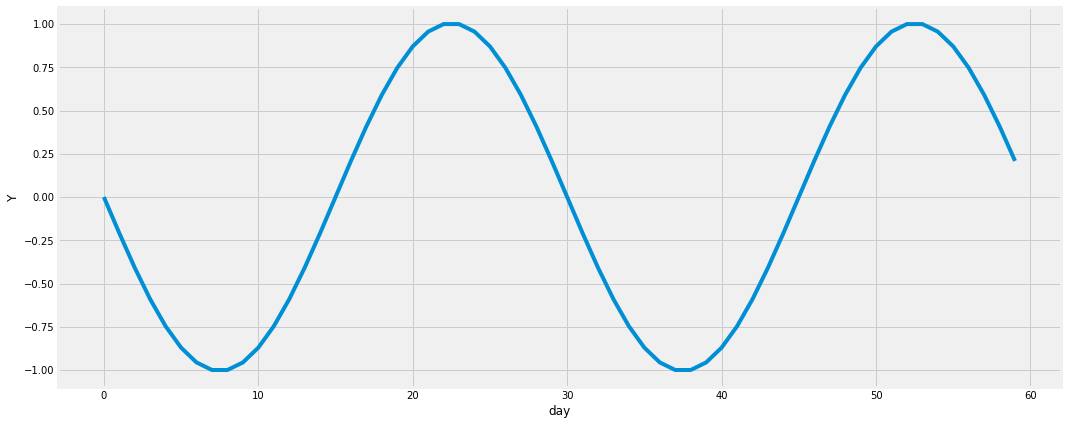

In [7]:
# rescale to be between -1 and 1
x1 = 2 *( x1-x1.min())/(x1.max() - x1.min()) - 1
plt.figure(figsize=(16,7))
plt.plot(time_index*Nt,x1)
plt.xlabel('day')
plt.ylabel('Y')
plt.show()

See above that the rise of our wave has now been delayed by days_delay. 

# 2. Spectral Analysis with FFT
Now let's use an algorithmic implementation of the 'Fourier Transform' to decompose our time series into its constituent sine and cosine coefficients. This tells us which frequencies are in our wave. 

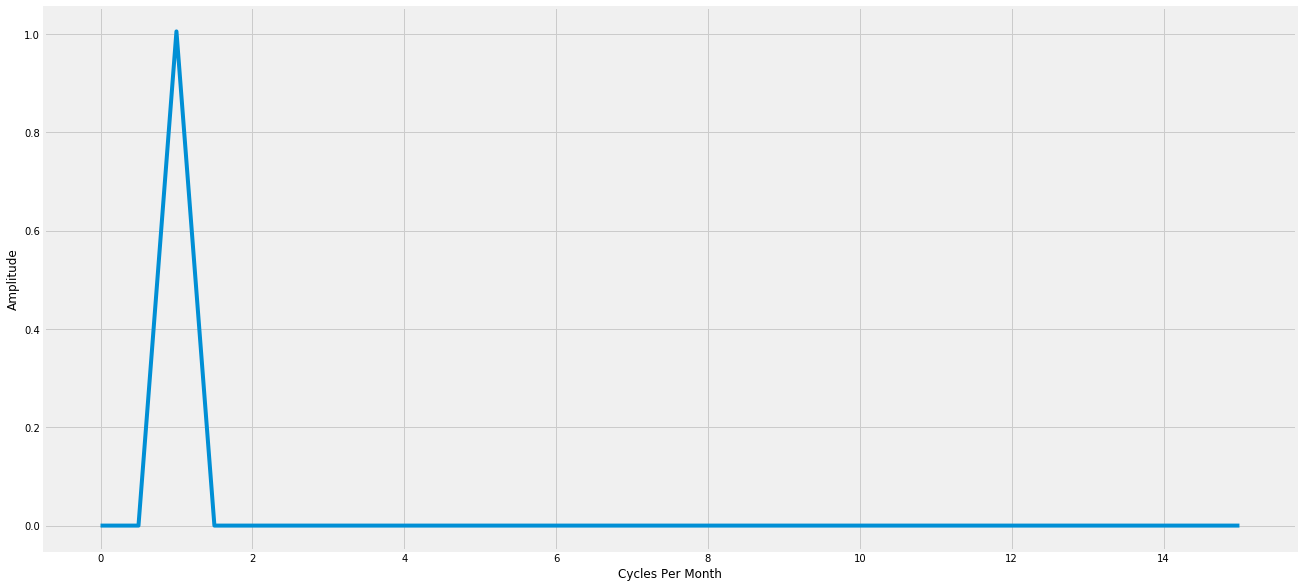

In [8]:

f = Fs * np.linspace(0,int(Nt/2), int(Nt/2+1))/Nt
fft1 = np.fft.fft(x1)
fft2 = 2*np.abs(fft1[0:int(Nt/2)+1]/Nt)
plt.figure(figsize=(20,10))
plt.plot(f, fft2)
plt.xlabel('Cycles Per Month')
plt.ylabel('Amplitude')
plt.show()

See above that we have 1 spike at a frequency of once per month (care needs to be taken in setting the x-axis units). Decide on a metric and stick to it. We have gone with 'cycles per MONTH'.

Note, also, the operations. It is not critical to understand this, but the FT gives an 'even' spectrum (one which is mirrored around the 'y' axis) and it also gives complex coefficients (with imaginary numbers). We therefore take only one half of the spectrum, take the ABS value, and multiply it by 2 to compensate for the fact we lost half the energy when taking only half the spectrum.

What happens if our signal does not have a full number of cycles (i.e. it contains discontinuities) like this:

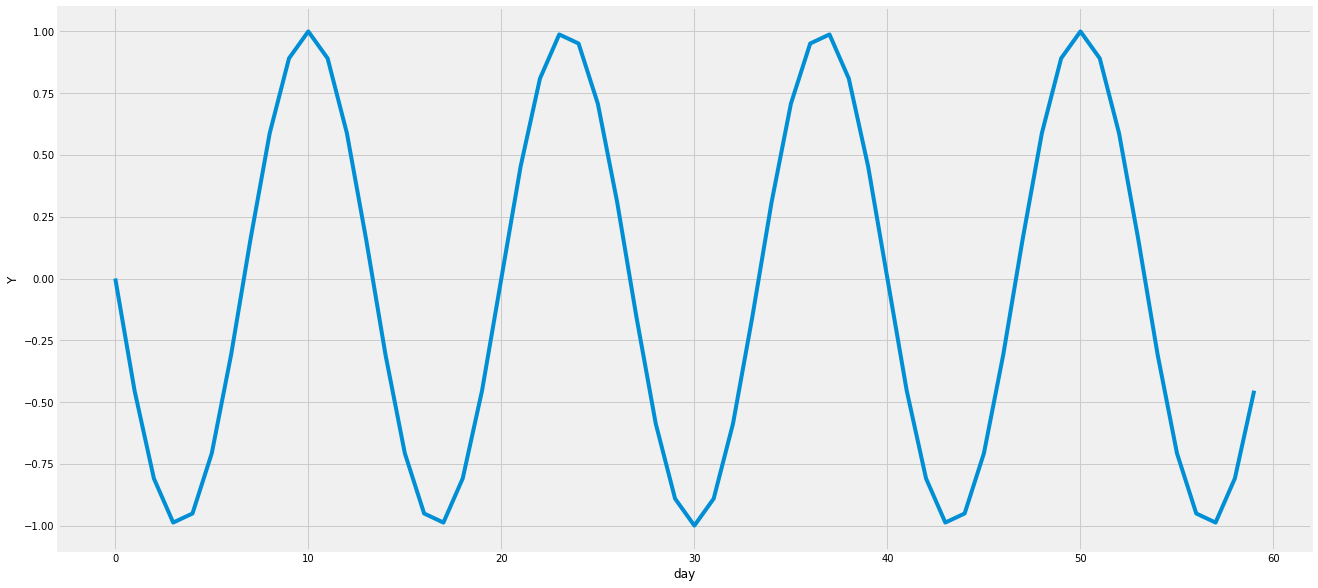

In [9]:
# sample time series with cycles at once per month
x1 = np.sin(2*time_index*np.pi*4.5 - (days_delay/30)*2*np.pi ) 

# rescale to be between -1 and 1
x1 = 2 *( x1-x1.min())/(x1.max() - x1.min()) - 1
plt.figure(figsize=(20,10))
plt.plot(time_index*Nt,x1)
plt.xlabel('day')
plt.ylabel('Y')
plt.show()

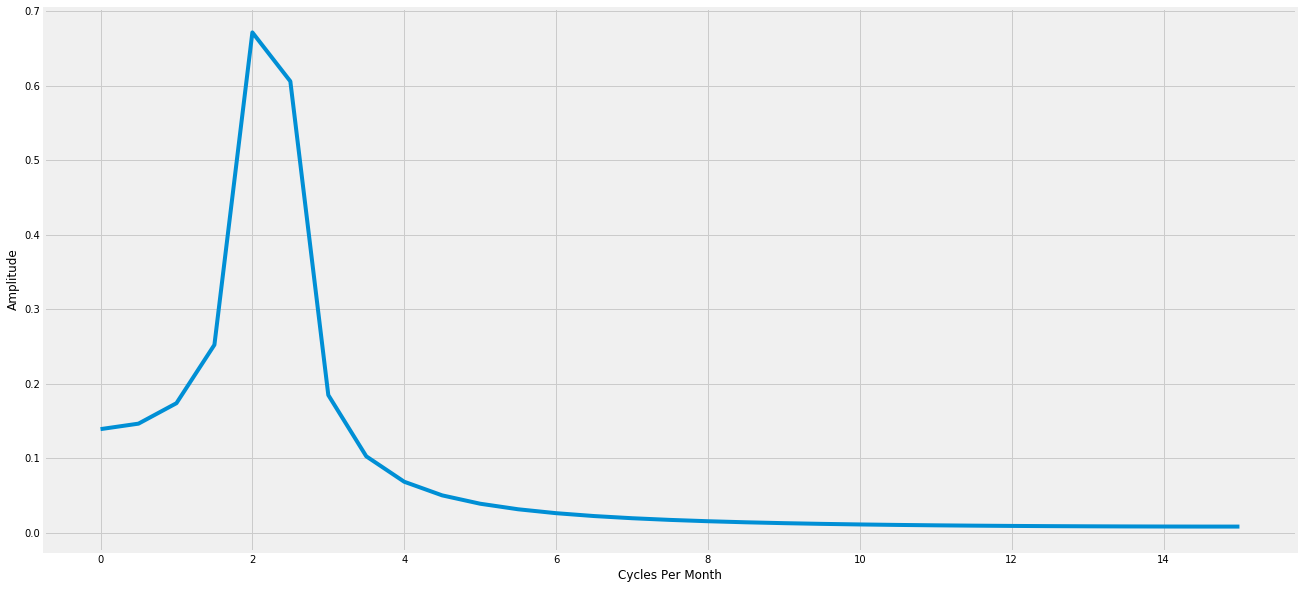

In [10]:

f = Fs * np.linspace(0,int(Nt/2), int(Nt/2+1))/Nt
fft1 = np.fft.fft(x1)
fft2 = 2*np.abs(fft1[0:int(Nt/2)+1]/Nt)
plt.figure(figsize=(20,10))
plt.plot(f, fft2)
plt.xlabel('Cycles Per Month')
plt.ylabel('Amplitude')
plt.show()

See now that the spectrum is more ambiguous. Remember the square wave which had lots of discontinuities? The same thing is happening here. We need many more frequencies to represent this wave. WE might know it is only a sine wave, but the algorithm has to transform exactly what it sees... To deal with this we use WINDOWING. We will come back to this later.

Now let's see what happens with a more complex wave...

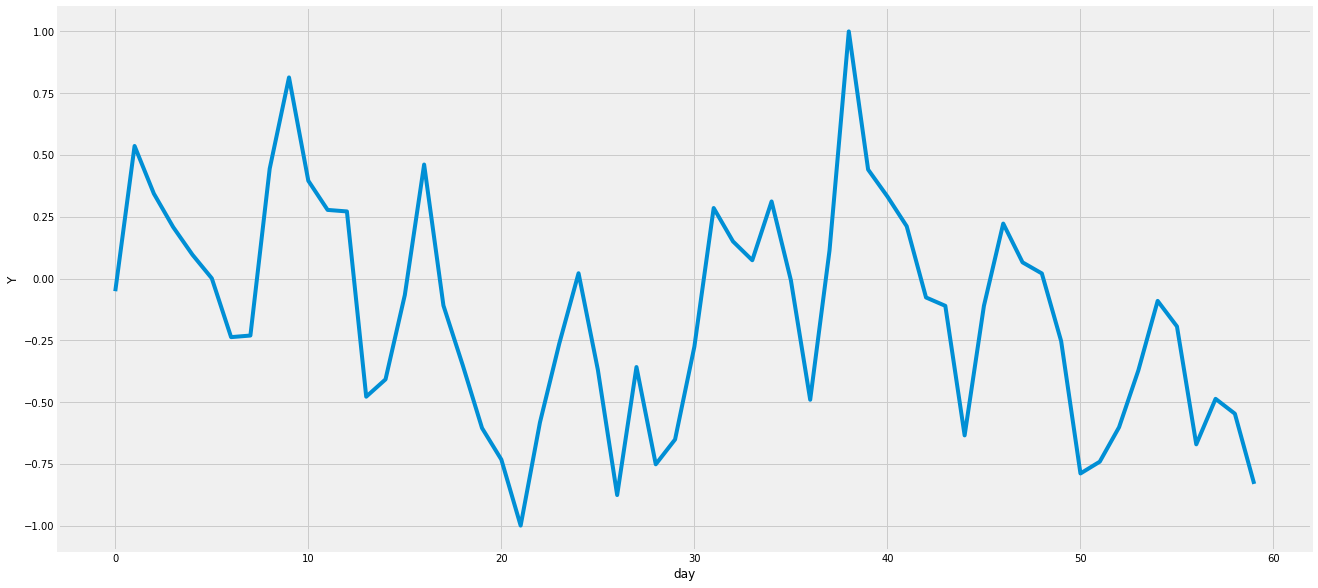

In [11]:
# sample time series with cycles at once per month, 4 times per month and twice a week and some noise
x1 = np.sin(2*time_index*np.pi*2) + np.sin(2*time_index*np.pi*8) + 0.5*np.sin(2*time_index*np.pi*16) + 0.4*np.random.randn(Nt)

# rescale to be between -1 and 1
x1 = 2 *( x1-x1.min())/(x1.max() - x1.min()) - 1

plt.figure(figsize=(20,10))
plt.plot(time_index*Nt,x1)
plt.xlabel('day')
plt.ylabel('Y')
plt.show()

This wave looks very chaotic. Is there order in this chaos?

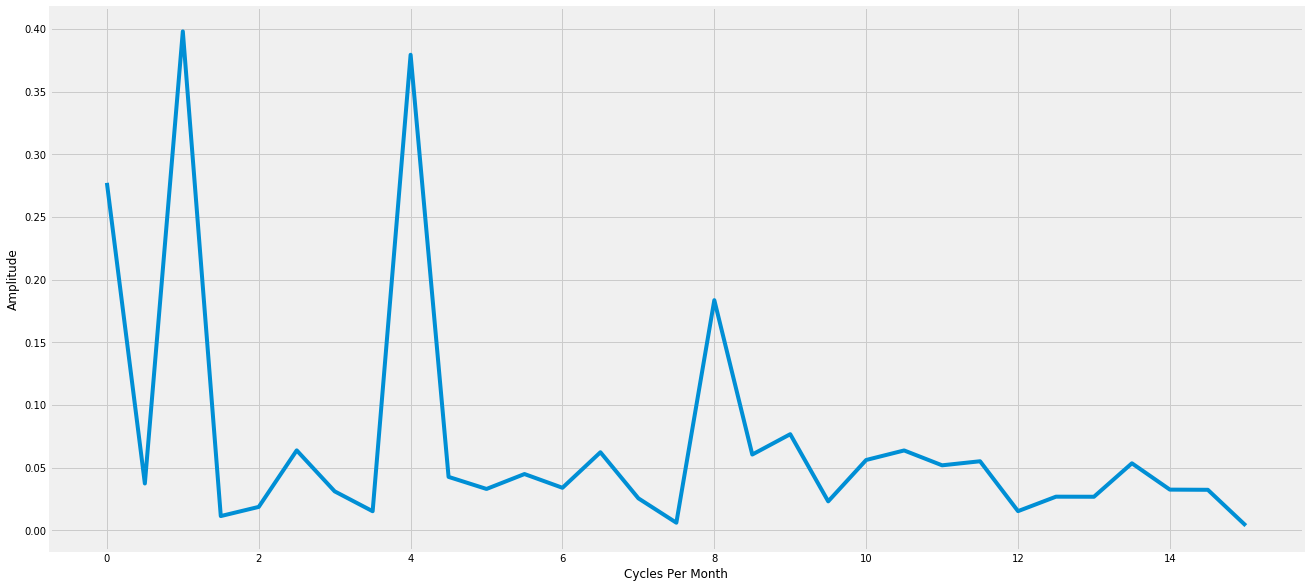

In [12]:
f = Fs * np.linspace(0,int(Nt/2), int(Nt/2+1))/Nt
fft1 = np.fft.fft(x1)
fft2 = 2*np.abs(fft1[0:int(Nt/2)+1]/Nt)
plt.figure(figsize=(20,10))
plt.plot(f, fft2)
plt.xlabel('Cycles Per Month')
plt.ylabel('Amplitude')
plt.show()

Yep... there is! We have recovered the frequencies of once per month, 4 times per month, and twice per week. Note that the more data we have, the more accurate the estimation of the frequency components will be, even if we have the same level of noise/'random variance'.

Note that we can use the inverse FFT to return to the original time series (so long as we KEEP the phase information). This is a therefore TRANSFORM, not a model. No data/information is lost.

# 3. Cross-spectral analysis with FFT

Let's imagine we have two time series, x1 and x2 

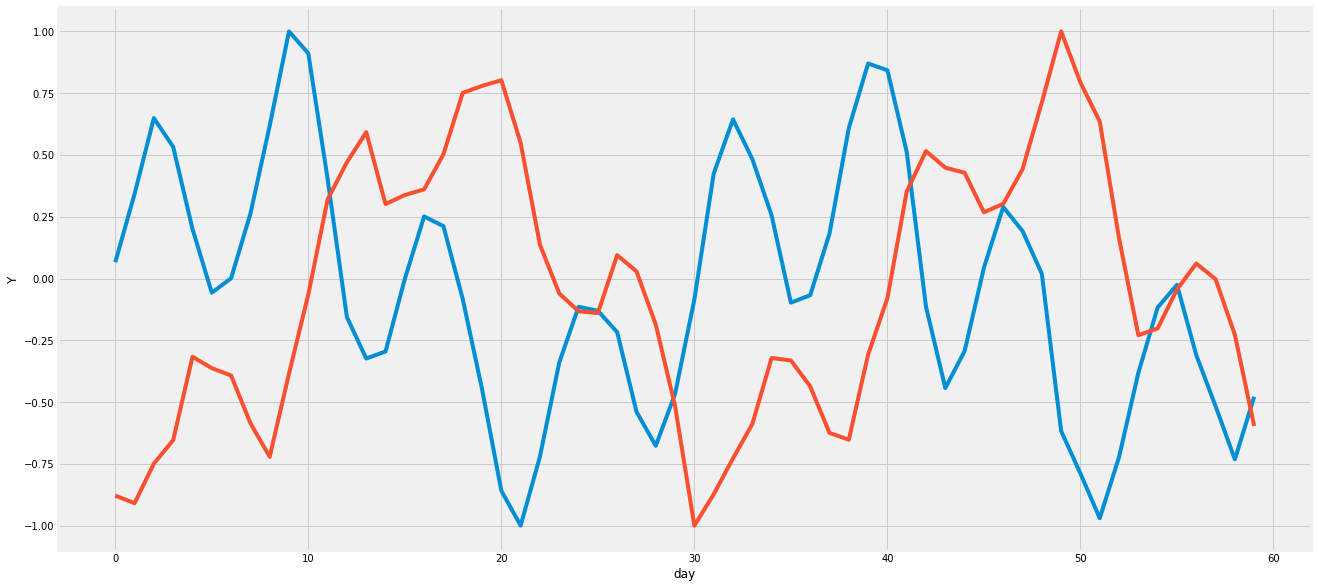

In [13]:
# sample time series with cycles (once a week and once per month) and some noise
x1 = np.sin(2*time_index*np.pi*2) + np.sin(2*time_index*np.pi*8) + 0.1 * np.random.randn(Nt)

x2 =  np.sin(2*time_index*np.pi*2 - (10/30)*2*np.pi) + 0.5 * np.sin(2*time_index*np.pi*8 - (10/30)*2*np.pi) + 0.1 * np.random.randn(Nt) 

# rescale to be between -1 and 1
x1 = 2 *( x1-x1.min())/(x1.max() - x1.min()) - 1
x2 = 2 *( x2-x2.min())/(x2.max() - x2.min()) - 1

plt.figure(figsize=(20,10))
plt.plot(time_index*Nt,x1)
plt.plot(time_index*Nt,x2)
plt.xlabel('day')
plt.ylabel('Y')
plt.show()

The two signals share the same frequencies (once a week and once per month), but are offset in their phase. Can we determine that they share the same frequencies after all...?

Yes! CPSD is effectively a measure of correlation in the power spectra of the two signals.

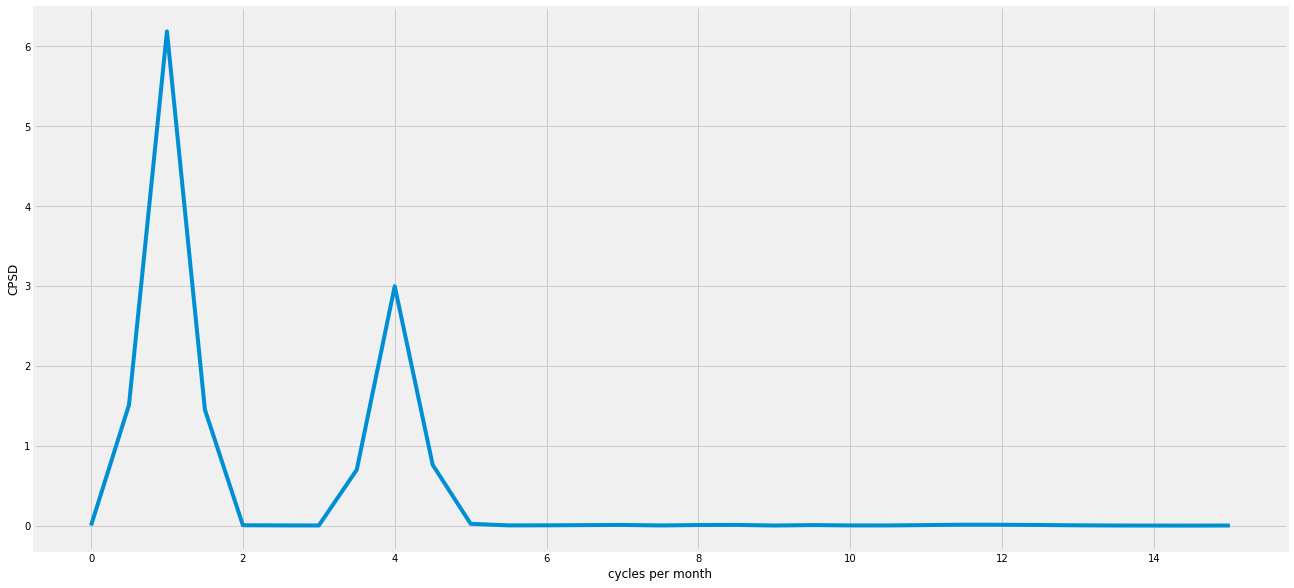

In [14]:
f1, Pxy = signal.csd(x1, x2, nperseg=Nt)
plt.figure(figsize=(20,10))
plt.plot(f, np.abs(Pxy))
plt.xlabel('cycles per month')
plt.ylabel('CPSD')
plt.show()